In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings

warnings.filterwarnings('ignore')

In [2]:
movie = pd.read_csv('movies.csv')
credit = pd.read_csv('credits.csv')

In [3]:
movie_credit = pd.merge(movie , credit , left_on = 'id' , right_on = 'movie_id')
movie_credit

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,Newlyweds,"[

In [4]:
movie_credit['spoken_languages']

0       [{"iso_639_1": "en", "name": "English"}, {"iso...
1                [{"iso_639_1": "en", "name": "English"}]
2       [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3                [{"iso_639_1": "en", "name": "English"}]
4                [{"iso_639_1": "en", "name": "English"}]
                              ...                        
4798        [{"iso_639_1": "es", "name": "Espa\u00f1ol"}]
4799                                                   []
4800             [{"iso_639_1": "en", "name": "English"}]
4801             [{"iso_639_1": "en", "name": "English"}]
4802             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, Length: 4803, dtype: object

In [6]:
df = movie_credit[['spoken_languages']]
df

,spoken_languages
0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."
3,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
...,...
4798,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]"
4799,[]
4800,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4801,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"


In [9]:
df = movie_credit[['spoken_languages']]

# Function to extract  language names from JSON Data

def extract_language(language_json):
    languages = json.loads(language_json)
    return[lang['name'] for lang in languages]

In [11]:
df['spoken_languages'].apply(extract_language)

0                                    [English, Español]
1                                             [English]
2       [Français, English, Español, Italiano, Deutsch]
3                                             [English]
4                                             [English]
                             ...                       
4798                                          [Español]
4799                                                 []
4800                                          [English]
4801                                          [English]
4802                                          [English]
Name: spoken_languages, Length: 4803, dtype: object

In [12]:
movie_credit['spoken_languages'].isnull().sum()

0

In [13]:
all_languages = df['spoken_languages'].apply(extract_language)
all_languages

0                                    [English, Español]
1                                             [English]
2       [Français, English, Español, Italiano, Deutsch]
3                                             [English]
4                                             [English]
                             ...                       
4798                                          [Español]
4799                                                 []
4800                                          [English]
4801                                          [English]
4802                                          [English]
Name: spoken_languages, Length: 4803, dtype: object

In [14]:
final_languages = []

for i in all_languages.values:
    final_languages.extend(i)

In [15]:
final_languages[:10]

['English',
 'Español',
 'English',
 'Français',
 'English',
 'Español',
 'Italiano',
 'Deutsch',
 'English',
 'English']

In [18]:
# Count the Occurance of each Languages

language_counts = pd.Series(final_languages).value_counts()
language_counts

English        4485
Français        437
Español         351
Deutsch         262
Italiano        188
               ... 
বাংলা             1
Català            1
??????            1
Bamanankan        1
Slovenščina       1
Length: 62, dtype: int64

In [21]:
# filter Language more tha 100 occurance

hundred_language = language_counts[language_counts > 100]

hundred_language

English     4485
Français     437
Español      351
Deutsch      262
Italiano     188
Pусский      185
普通话          107
dtype: int64

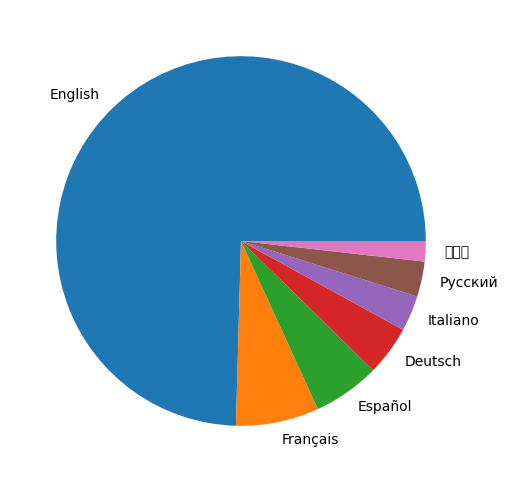

In [24]:
# Pie - Chart Create

plt.figure(figsize = (6,6))

#make pie

plt.pie(hundred_language , labels= hundred_language.index)

plt.show()

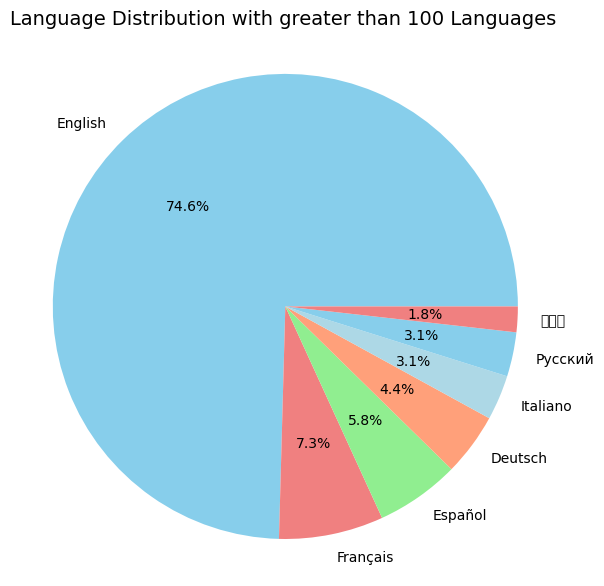

In [44]:
# Pie - Chart Create

plt.figure(figsize = (6,6))

#make pie , % decide , colors decide

plt.pie(hundred_language , labels= hundred_language.index , autopct = '%1.1f%%' \
        , colors = ['skyblue' , 'lightcoral' , 'lightgreen', 'lightsalmon' , 'lightblue'])
# title
plt.title('Language Distribution with greater than 100 Languages' , fontsize =14)

plt.axis('equal')
plt.tight_layout()
plt.show()

plt.show()